In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [ ]:
data = pd.read_csv("repdata%2Fdata%2FStormData.csv.bz2", sep=',', compression='bz2', encoding='latin_1')
data.head()

## Explore data variables

In [3]:
data.columns

Index(['STATE__', 'BGN_DATE', 'BGN_TIME', 'TIME_ZONE', 'COUNTY', 'COUNTYNAME',
       'STATE', 'EVTYPE', 'BGN_RANGE', 'BGN_AZI', 'BGN_LOCATI', 'END_DATE',
       'END_TIME', 'COUNTY_END', 'COUNTYENDN', 'END_RANGE', 'END_AZI',
       'END_LOCATI', 'LENGTH', 'WIDTH', 'F', 'MAG', 'FATALITIES', 'INJURIES',
       'PROPDMG', 'PROPDMGEXP', 'CROPDMG', 'CROPDMGEXP', 'WFO', 'STATEOFFIC',
       'ZONENAMES', 'LATITUDE', 'LONGITUDE', 'LATITUDE_E', 'LONGITUDE_',
       'REMARKS', 'REFNUM'],
      dtype='object')


In [4]:
data.describe(include='all')

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,...,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
count,902297.000000,902297,902297,902297,902297.000000,900708,902297,902297,902297.000000,354965,...,283884,760228,653528,308268,902250.000000,902297.000000,902257.000000,902297.000000,614864,902297.000000
unique,NaN,16335,4142,22,NaN,29600,72,985,NaN,34,...,8,541,249,25111,NaN,NaN,NaN,NaN,436905,NaN
top,NaN,5/25/2011 0:00:00,12:00:00 AM,CST,NaN,JEFFERSON,TX,HAIL,NaN,N,...,K,OUN,"TEXAS, North",...,NaN,NaN,NaN,NaN,,NaN
freq,NaN,1202,10163,547493,NaN,7840,83728,288661,NaN,86752,...,281832,17393,12193,205988,NaN,NaN,NaN,NaN,24013,NaN
mean,31.200958,NaN,NaN,NaN,100.642905,NaN,NaN,NaN,1.483889,NaN,...,NaN,NaN,NaN,NaN,2874.942950,6939.538350,1451.611545,3509.139732,NaN,451149.000000
std,16.570178,NaN,NaN,NaN,107.276509,NaN,NaN,NaN,5.481574,NaN,...,NaN,NaN,NaN,NaN,1657.648801,3958.062506,1858.727873,4475.682973,NaN,260470.852256
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000,-14451.000000,0.000000,-14455.000000,NaN,1.000000
25%,19.000000,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,2802.000000,7247.000000,0.000000,0.000000,NaN,225575.000000
50%,30.000000,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,3540.000000,8707.000000,0.000000,0.000000,NaN,451149.000000
75%,45.000000,NaN,NaN,NaN,131.000000,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,4019.000000,9605.000000,3549.000000,8735.000000,NaN,676723.000000


Eliminate unnecessary data variables

In [5]:
newdata = pd.DataFrame(data[['EVTYPE', 'FATALITIES', 'INJURIES', 'PROPDMG', 'PROPDMGEXP', 'CROPDMG', 'CROPDMGEXP']])

Count Fatalities and Injuries

In [47]:
print("Fatalities\n Sum: ", newdata['FATALITIES'].sum(), "\n Max: ", newdata['FATALITIES'].max())
print("Injuries\n Sum: ", newdata['INJURIES'].sum(), "\n Max: ", newdata['INJURIES'].max())

Fatalities
 Sum:  15145.0 
 Max:  583.0
Injuries
 Sum:  140528.0 
 Max:  1700.0


Check and Account for PROPDMGEXP and CROPDMGEXP variables

In [7]:
newdata['PROPDMGEXP'].value_counts()

K    424665
M     11330
0       216
B        40
5        28
1        25
2        13
?         8
m         7
H         6
7         5
+         5
6         4
3         4
4         4
-         1
8         1
h         1
Name: PROPDMGEXP, dtype: int64

In [36]:
newdata['CROPDMGEXP'].value_counts()

K    281832
M      1994
k        21
0        19
B         9
?         7
2         1
m         1
Name: CROPDMGEXP, dtype: int64

The property and crop damage numbers have various units identified as H-Hundred, K-Thousand, M-Million and B-Billion. These need to be converted to the same unit ($).

In [106]:
newdata['PROPDMGEXP'] = newdata['PROPDMGEXP'].replace(to_replace=["H", "h", 'K', 'k', 'M', 'm', 'B', 'b', '', '-', '?', '+'], value=[2, 2, 3, 3, 6, 6, 9, 9, 0, 0, 0, 0])
newdata['CROPDMGEXP'] = newdata['CROPDMGEXP'].replace(to_replace=['K', 'k', 'M', 'm', 'B', '', '?'], value=[3, 3, 6, 6, 9, 0, 0])
newdata[['PROPDMGEXP', 'CROPDMGEXP']] = newdata[['PROPDMGEXP', 'CROPDMGEXP']].fillna(0)

newdata['PROPDMGEXP'] = newdata['PROPDMGEXP'].apply(lambda x: 10**int(x))
newdata['CROPDMGEXP'] = newdata['CROPDMGEXP'].apply(lambda x: 10**int(x))

newdata['PROPDMG'] = newdata['PROPDMG'] * newdata['PROPDMGEXP']
newdata['CROPDMG'] = newdata['CROPDMG'] * newdata['CROPDMGEXP']

## Results

Aggregate the results for each event type across all counties over entire time period.

In [ ]:
agrigate = newdata.groupby('EVTYPE').sum()

#### Largest Impact to Public Health

Сonstruct a diagram for Fatalities

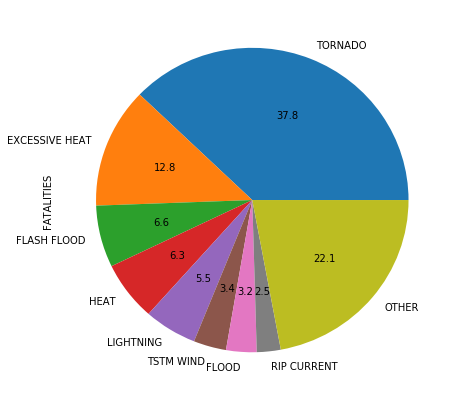

In [141]:
f = pd.DataFrame(data=agrigate['FATALITIES'].sort_values(ascending=False)[:8])
f.loc['OTHER'] = agrigate['FATALITIES'].sort_values(ascending=False)[9:].sum()
f['FATALITIES'].plot.pie(autopct='%.1f', figsize=(7, 7))

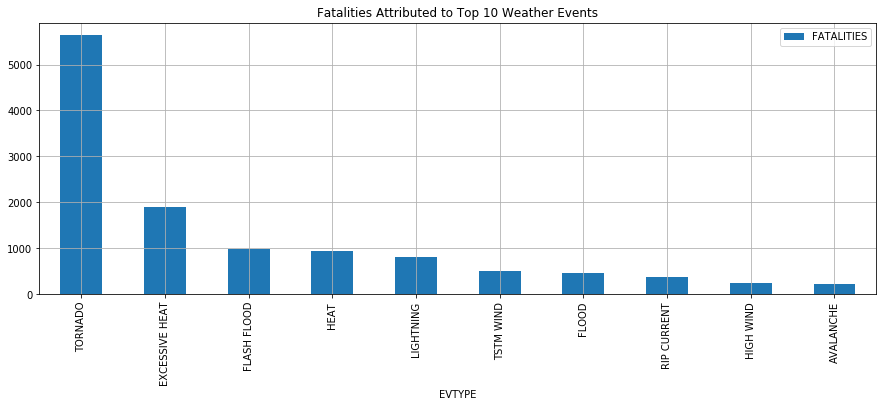

In [118]:
fatality = pd.DataFrame(index=agrigate.index, data=agrigate['FATALITIES'])
fatality = fatality.sort_values(by='FATALITIES', ascending=False)
fatality[:10].plot.bar(figsize=[15,5], title="Fatalities Attributed to Top 10 Weather Events")
plt.grid()

Construct a diagram for Injuries

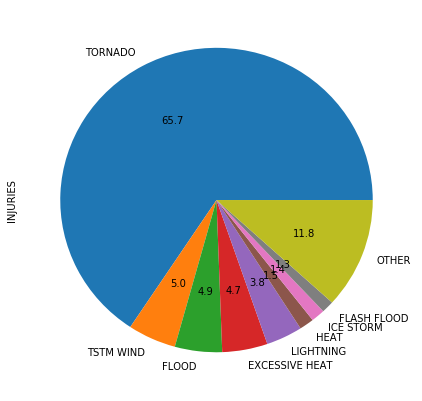

In [140]:
ing = pd.DataFrame(data=agrigate['INJURIES'].sort_values(ascending=False)[:8])
ing.loc['OTHER'] = agrigate['INJURIES'].sort_values(ascending=False)[9:].sum()
ing['INJURIES'].plot.pie(autopct='%.1f', figsize=(7, 7))

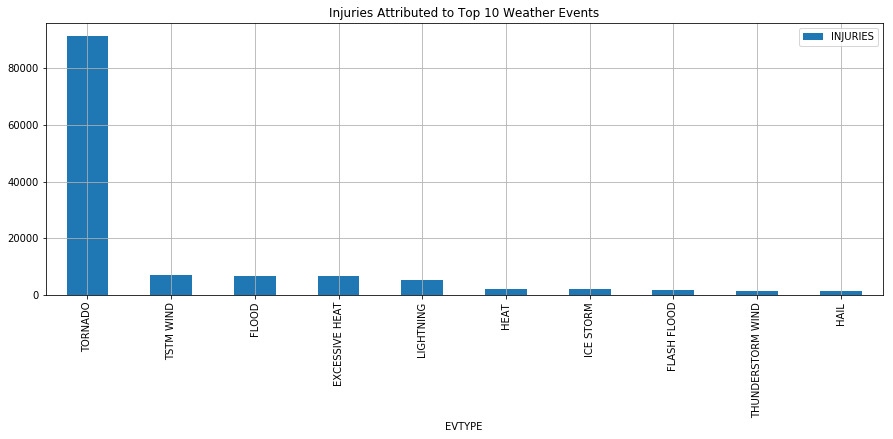

In [113]:
injuries = pd.DataFrame(index=agrigate.index, data=agrigate['INJURIES'])
injuries = injuries.sort_values(by='INJURIES', ascending=False)
injuries[:10].plot.bar(figsize=[15,5], title="Injuries Attributed to Top 10 Weather Events")
plt.grid()

Сalculat the general harm to health

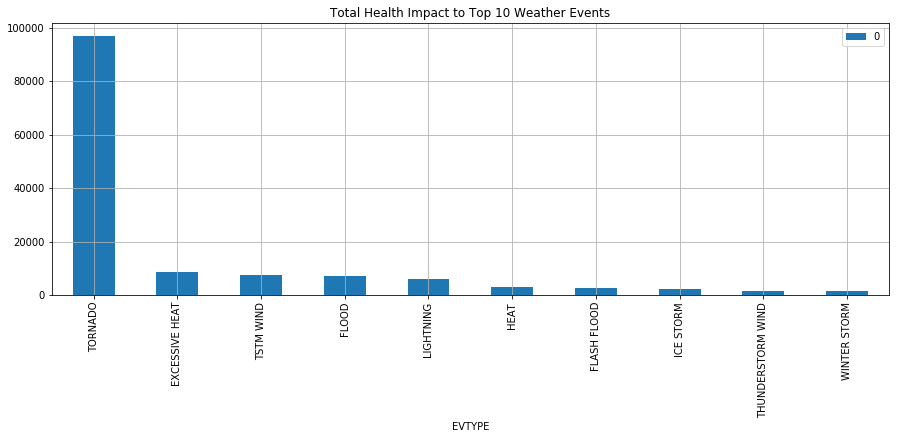

In [114]:
total = pd.DataFrame(index=agrigate.index, data=(agrigate['INJURIES'] + agrigate['FATALITIES']))
total = total.sort_values(by=0, ascending=False)
total[:10].plot.bar(figsize=[15,5], title="Total Health Impact to Top 10 Weather Events")
plt.grid()

#### Impact of Severe Weather On Property and Crops

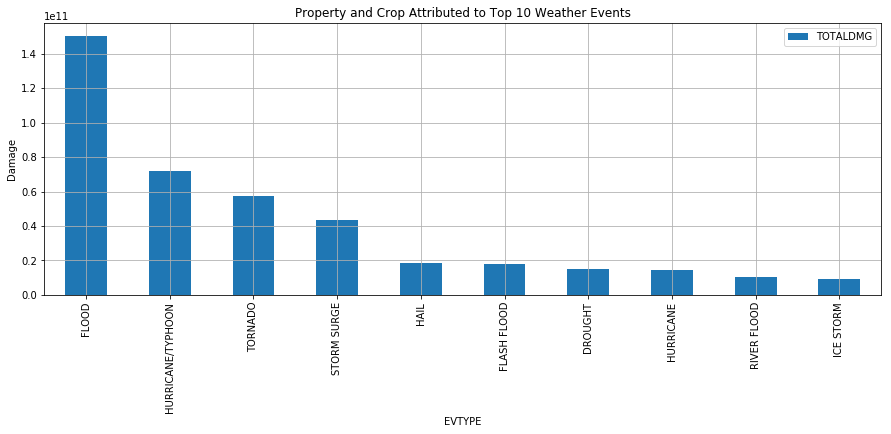

In [117]:
agrigate['TOTALDMG'] = agrigate['PROPDMG'] + agrigate['CROPDMG']
totaldmg = pd.DataFrame(index=agrigate.index, data=agrigate['TOTALDMG'])
totaldmg = totaldmg.sort_values(by='TOTALDMG', ascending=False)

totaldmg[:10].plot.bar(figsize=[15,5], title="Property and Crop Attributed to Top 10 Weather Events")
plt.ylabel('Damage')
plt.grid()

## Conclusion

The events most harmful to population health:
* Tornado
* Excessive heat
* TSTM Wind

65,7% of all injuries is caused by tornadoes, wind and floods are only 5% and 4,9%.
37% of fatalities occur due to tornadoes, 12% - excessive heat, 6.6% - flash flooding.

The events that have the greatest economic consequences are:
* Flood
* Hurricane/Typhoon
* Tornado

